<a href="https://colab.research.google.com/github/divyansh-shrotriya/oral-cancer-cnn/blob/main/Oral_Cancer_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set(style="whitegrid")

Dataset Path

In [3]:
DATASET_PATH = "/content/drive/MyDrive/First_Set"
os.listdir(DATASET_PATH)

['100x_OSCC_Histopathological_Images',
 '100x_Normal_Oral_Cavity_Histopathological_Images']

Class Names

In [4]:
classes = sorted(os.listdir(DATASET_PATH))
classes

['100x_Normal_Oral_Cavity_Histopathological_Images',
 '100x_OSCC_Histopathological_Images']

Image Count per Class

In [5]:
image_counts = {}

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    image_counts[cls] = len(os.listdir(cls_path))

df_counts = pd.DataFrame.from_dict(
    image_counts, orient='index', columns=['Image Count']
)
df_counts

,Image Count
100x_Normal_Oral_Cavity_Histopathological_Images,89
100x_OSCC_Histopathological_Images,439


Class Distribution Plot

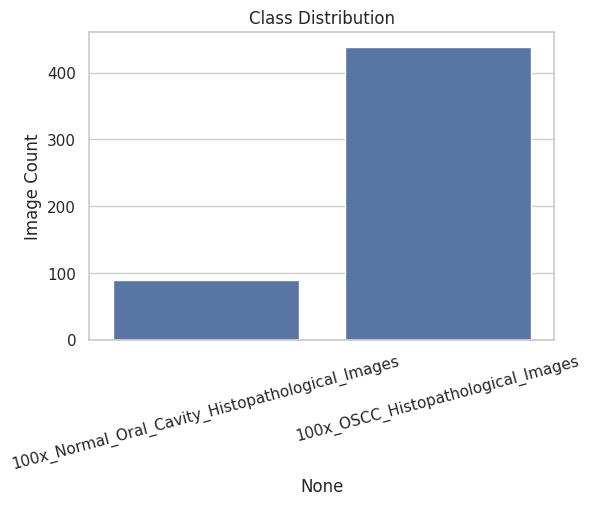

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x=df_counts.index, y=df_counts['Image Count'])
plt.xticks(rotation=15)
plt.title("Class Distribution")
plt.show()

Visualize Sample Images

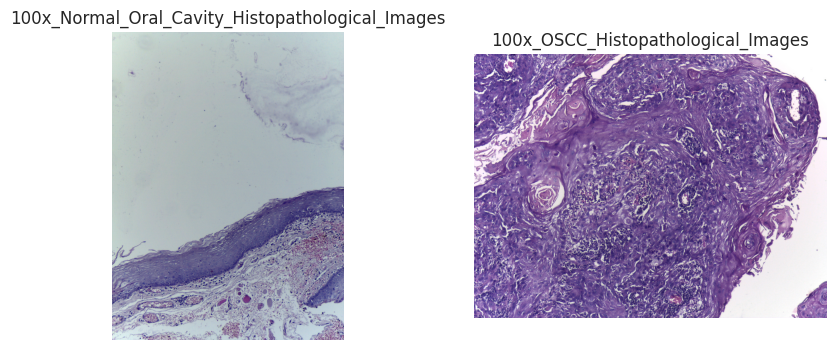

In [7]:
plt.figure(figsize=(10,4))

for i, cls in enumerate(classes):
    img_name = os.listdir(os.path.join(DATASET_PATH, cls))[0]
    img_path = os.path.join(DATASET_PATH, cls, img_name)
    img = Image.open(img_path)

    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.show()

Image Size Analysis

In [8]:
widths, heights = [], []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(cls_path)[:50]:
        img = Image.open(os.path.join(cls_path, img_name))
        widths.append(img.size[0])
        heights.append(img.size[1])

print("Average Width :", int(np.mean(widths)))
print("Average Height:", int(np.mean(heights)))

Average Width : 1945
Average Height: 1638


Pixel Intensity Distribution

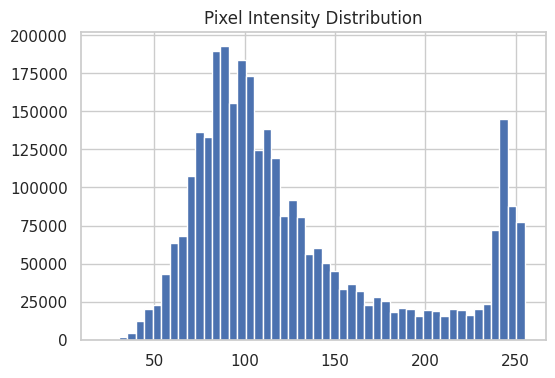

In [9]:
img_gray = Image.open(img_path).convert("L")
img_array = np.array(img_gray)

plt.figure(figsize=(6,4))
plt.hist(img_array.flatten(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.show()

EDA Summary (Markdown)

In [ ]:
### EDA Summary

- The dataset consists of two classes:
  - 100x_Normal_Oral_Cavity_Histopathological_Images
  - 100x_OSCC_Histopathological_Images
- The dataset is approximately balanced, reducing the risk of class bias during training.
- Images are high-resolution histopathological samples captured at 100x magnification, exhibiting rich texture patterns rather than distinct object boundaries.
- Image dimensions show minor variation, making resizing to a fixed input size (224×224) appropriate for CNN-based models.
- Pixel intensity distribution indicates sufficient contrast and information content, suitable for deep feature extraction.
- Due to the limited dataset size, training a CNN from scratch would likely lead to overfitting.
- Transfer learning with a pretrained deep CNN is the most suitable approach for this dataset.
- Data augmentation is necessary to improve generalization and mitigate overfitting.
